In [53]:
import pandas as pd 
import numpy as np 
import scipy as sp
import sklearn
import glob
import json

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr


from string import digits
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
interesting_categories=["Beauty & Spas","Shopping","Bars"]


In [2]:
data = []
for file in glob.glob('yelp_academic_dataset_business.json'):
    with open(file,encoding='utf8',errors='ignore') as f:
        for line in f:
            these_categories = [json.loads(line)['categories']]
            #print(any(x in these_categories for x in interesting_categories))
            #print(these_categories)
            if json.loads(line)['city'] == 'Toronto' and (any(x in these_categories for x in interesting_categories)) and json.loads(line)['review_count']>=10:
                data.append(json.loads(line))

In [3]:
df = pd.DataFrame(data)

In [4]:
df.drop(columns=['address','city','state','postal_code','latitude','longitude','is_open','hours','attributes','stars'],inplace=True)

In [5]:
print(len(df))
display(df)

4


,business_id,name,review_count,categories
0,Tk3vY4P-yxWS-GPcRjo50Q,As You Like It,12,Shopping
1,-oMzx1o-o62e5tcBmomcng,Williams Sonoma,15,Shopping
2,ikRqxe8NlYUJDcw8aalwgQ,Noori Extension,13,Shopping
3,KPn03qwAeRo0E_42gHcdew,Lakeview Tower Beauty Salon & Nail Spa,24,Beauty & Spas


In [6]:
df.set_index('business_id',inplace=True)
df.insert(2,'Reviews',value='')

In [7]:


#df.at[ikRqxe8NlYUJDcw8aalwgQ,'Reviews']

In [9]:
remove_digits = str.maketrans('', '', digits)
#s = '12314125134552554gergervv43 dwfeef ewgjpjp34joi3oij3 oij23joij23'
#res = s.translate(remove_digits)
#print(res)

In [10]:
for file in glob.glob('yelp_academic_dataset_review.json'):
    with open(file,encoding='utf8',errors='ignore') as f:
        for line in f:
            indeces = df.index
            this_business = json.loads(line)['business_id']
            #print(any(x in these_categories for x in interesting_categories))
            #print(these_categories)
            if this_business in indeces:
                read = json.loads(line)['text'].strip()
                parsed = read.translate(remove_digits) 
                df.at[this_business,'Reviews'] += parsed

In [11]:
df.head()

,name,review_count,Reviews,categories
business_id,,,,
Tk3vY4P-yxWS-GPcRjo50Q,As You Like It,12,We took a few bridesmaid's dresses and the wed...,Shopping
-oMzx1o-o62e5tcBmomcng,Williams Sonoma,15,"I liked this place fine, despite other negativ...",Shopping
ikRqxe8NlYUJDcw8aalwgQ,Noori Extension,13,Terrible experience:(...\nI am agreed they hav...,Shopping
KPn03qwAeRo0E_42gHcdew,Lakeview Tower Beauty Salon & Nail Spa,24,My go to eyebrow waxing place. Be prepared for...,Beauty & Spas


In [8]:
#df.to_csv(path_or_buf='askisi3MergedReviews.csv')
#df=pd.read_csv('askisi3MergedReviews.csv')
#df.head()

In [42]:
import sklearn.feature_extraction.text as sk_text
vectorizer = sk_text.TfidfVectorizer(stop_words = 'english',#max_features=1000
min_df=3)
X = vectorizer.fit_transform(df.Reviews)
print(X.toarray())
print(X.shape)
print('\n')  
print (vectorizer.get_feature_names())


[[0.12839787 0.06419894 0.0962984  0.02624342 0.02624342 0.12839787
  0.05248684 0.0962984  0.06419894 0.         0.03209947 0.03209947
  0.03209947 0.03209947 0.06419894 0.         0.03209947 0.10497367
  0.07873026 0.         0.         0.         0.03209947 0.0962984
  0.0962984  0.06419894 0.03209947 0.03209947 0.02624342 0.03209947
  0.06419894 0.0962984  0.03209947 0.20994735 0.         0.03209947
  0.03209947 0.06419894 0.03209947 0.05248684 0.0962984  0.06419894
  0.03209947 0.03209947 0.03209947 0.06419894 0.         0.05248684
  0.10497367 0.10497367 0.         0.06419894 0.03209947 0.06419894
  0.03209947 0.03209947 0.02624342 0.03209947 0.06419894 0.19259681
  0.15746051 0.03209947 0.06419894 0.15746051 0.16049734 0.03209947
  0.03209947 0.03209947 0.03209947 0.15746051 0.06419894 0.
  0.05248684 0.0962984  0.         0.02624342 0.02624342 0.0962984
  0.         0.         0.20994735 0.03209947 0.02624342 0.03209947
  0.05248684 0.0962984  0.03209947 0.06419894 0.03209947 0

In [43]:
vectorizer2 = sk_text.TfidfVectorizer(stop_words = 'english',#max_features=1000
min_df=3)
categ = vectorizer2.fit_transform(df.categories)
print(categ.toarray())

[[1.]
 [1.]
 [1.]
 [0.]]


In [44]:
k=3
kmeansLbls = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=10, n_init=3)
kmeansLbls.fit_predict(categ)
truelbl = kmeansLbls.labels_
print(truelbl)

[0 0 0 1]


In [45]:
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=10, n_init=3)
kmeans.fit_predict(X)
kmeans_labels = kmeans.labels_
print(kmeans_labels)

[0 2 1 0]


In [46]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 time
 place
 work
 job
 did
 service
 ve
 make
 just
 know
Cluster 1:
 phone
 store
 great
 new
 stuff
 want
 like
 getting
 service
 price
Cluster 2:
 store
 service
 like
 staff
 high
 time
 quality
 customer
 end
 prices


print()

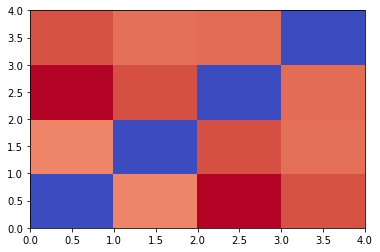

In [48]:
import sklearn.metrics as metrics

idx = np.argsort(kmeans_labels) # returns the indices in sorted order
rX = X[idx,:]
r_euclid = metrics.euclidean_distances(rX)
#r_euclid = euclidean_dists[idx,:][:,idx]
plt.pcolormesh(r_euclid,cmap=plt.cm.coolwarm)

import sklearn.feature_extraction.text as sk_text
corpus = df.categories
vect = sk_text.CountVectorizer(min_df=1)
Xcat = vect.fit_transform(corpus)
print(Xcat.toarray())  
vect.get_feature_names()

dictionary = df.to_dict
display(dictionary)
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
print(type(vec.fit_transform(dictionary)))
print(vec.fit_transform(dictionary).toarray())
vec.get_feature_names()

In [54]:
#import sklearn.datasets as sk_data
classes = {
    0:'Shopping',
    1:'Bars',
    2:'Beauty & Spas',
    
}
#print(kmeans.labels_)
C = metrics.confusion_matrix(truelbl,kmeans.labels_)

mapped_kmeans_labels,C = cluster_class_mapping(truelbl,kmeans.labels_)
print (C)
p = metrics.precision_score(df.Reviews,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(df.Reviews,mapped_kmeans_labels, average = None)
print(r)

NameError: name 'cluster_class_mapping' is not defined

In [71]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
agglo_labels = agglo.fit_predict(X.toarray())
print(agglo_labels)

[1 0 0 2]
